In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('Default.xlsx')
df.drop(["Unnamed: 0","student"],axis=1,inplace=True)

Dict={"No":0,"Yes":1}
df.default=[Dict[i] for i in df.default]

df=df.reset_index()
df.drop('index',axis=1,inplace=True)

In [3]:
def distance1(test_data_balance,test_data_income,k):
    train_data=df[0:9899]
    Dist=[]
    for i in range (len(train_data)):
        distance = ((train_data.balance[i]-test_data_balance)**2 + (train_data.income[i]-test_data_income)**2)**0.5
        Dist.append(distance)
    train_data["Dist"]=Dist
    train_data=train_data.sort_values("Dist")
    a=train_data[0:k]
    a=a.reset_index()
    a.drop('index',axis=1,inplace=True)
    No=[]
    Yes=[] 
    for i in range(len(a)):
        if a.default[i]==0:
           No.append(a.default[i]) 
        else:
            Yes.append(a.default[i])
    if len(No) > len(Yes):
        return 0 #print(" The pridicted class will be No",len(No))
    else:
        return 1 #print(" The pridicted class will be Yes",len(yes))
    
    
test_data=df[9900:10000]
test_data=test_data.reset_index()
test_data.drop('index',axis=1,inplace=True)
test_data

l1=[]
k=int(input("enter the value of k:"))
for i in range(len(test_data)):
    A=distance1(test_data.balance[i],test_data.income[i],k)
    l1.append(A)

enter the value of k:3


/tmp/ipykernel_11835/2731016950.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["Dist"]=Dist


In [4]:
l1=l1
l2=test_data['default']

In [5]:
count_l1 = 0
count_l2 = 0
for i in range(len(l1)):
    if l1[i] == l2[i]:
        count_l1 += 1
    else:
        count_l2 += 1

Accuarcy_rate = (count_l1/len(test_data)) * 100  
print('Accuarcy_rate =',Accuarcy_rate,"%")

Accuarcy_rate = 95.0 %


In [6]:
predicted_test=np.array(l1)

In [7]:
actual_test=test_data.default
actual_test=np.array(actual_test)

[[94  1]
 [ 4  1]]


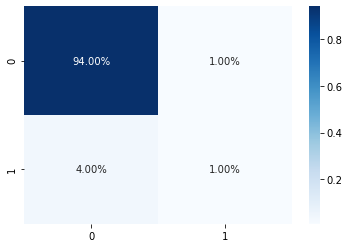

In [11]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(actual_test, predicted_test)
print(confusion_matrix)
sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True, fmt='.2%', cmap='Blues')